# Real Estate Data Analysis
This notebook explores a real estate dataset with the aim to understand key patterns, trends, and relationships in property data. The analysis includes feature engineering, multivariate analysis to provide insights into property prices and factors influencing them.


In [19]:
import pandas as pd
import numpy as np

datapath = r"D:\ABHISHEK DIGICROME\Project 3 Nexthikes\housing_data (1).csv"
# Load the dataset
df = pd.read_csv(datapath)

# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [20]:
df.tail()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,1459,SC20,RL,75,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
df.describe()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [23]:
for column in df.columns:
    null_count = df[column].isnull().sum()  # Count null values in each column
    print(f"{column}: {null_count} null values")

Unnamed: 0: 0 null values
MSSubClass: 0 null values
MSZoning: 0 null values
LotFrontage: 0 null values
LotArea: 0 null values
Street: 0 null values
Alley: 1369 null values
LotShape: 0 null values
LandContour: 0 null values
Utilities: 0 null values
LotConfig: 0 null values
LandSlope: 0 null values
Neighborhood: 0 null values
Condition1: 0 null values
Condition2: 0 null values
BldgType: 0 null values
HouseStyle: 0 null values
OverallQual: 0 null values
OverallCond: 0 null values
YearBuilt: 0 null values
YearRemodAdd: 0 null values
RoofStyle: 0 null values
RoofMatl: 0 null values
Exterior1st: 0 null values
Exterior2nd: 0 null values
MasVnrType: 872 null values
MasVnrArea: 0 null values
ExterQual: 0 null values
ExterCond: 0 null values
Foundation: 0 null values
BsmtQual: 0 null values
BsmtCond: 0 null values
BsmtExposure: 0 null values
BsmtFinType1: 0 null values
BsmtFinSF1: 0 null values
BsmtFinType2: 0 null values
BsmtFinSF2: 0 null values
BsmtUnfSF: 0 null values
TotalBsmtSF: 0 null val

In [24]:
# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for non-numeric columns with the mode (most frequent value)
for col in non_numeric_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any remaining missing values
df.isnull().sum()


C:\Users\Dell\AppData\Local\Temp\ipykernel_15984\1666366731.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [25]:
# Check for duplicates and remove if any
df.drop_duplicates(inplace=True)


In [26]:
# Check for any anomalies (e.g., negative values for house prices or size)
df = df[df['LotArea'] >= 0]
df = df[df['SalePrice'] >= 0]

In [27]:
# Display cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

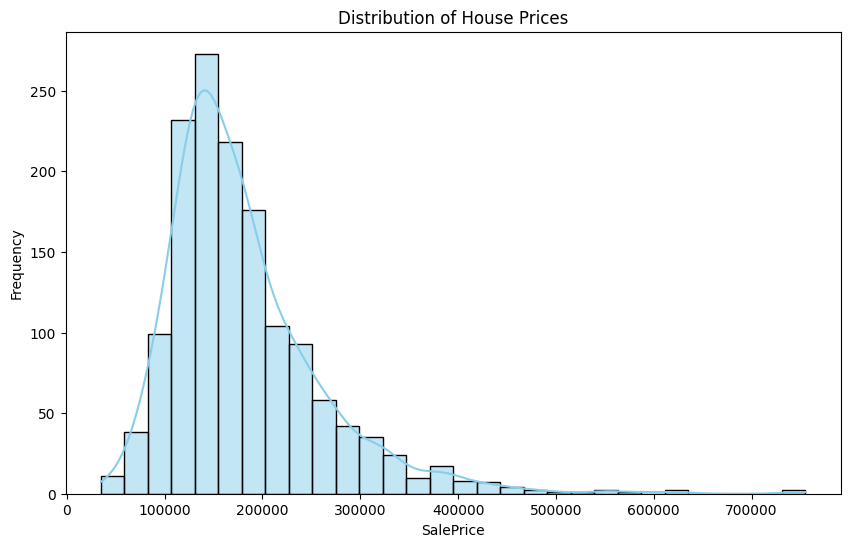

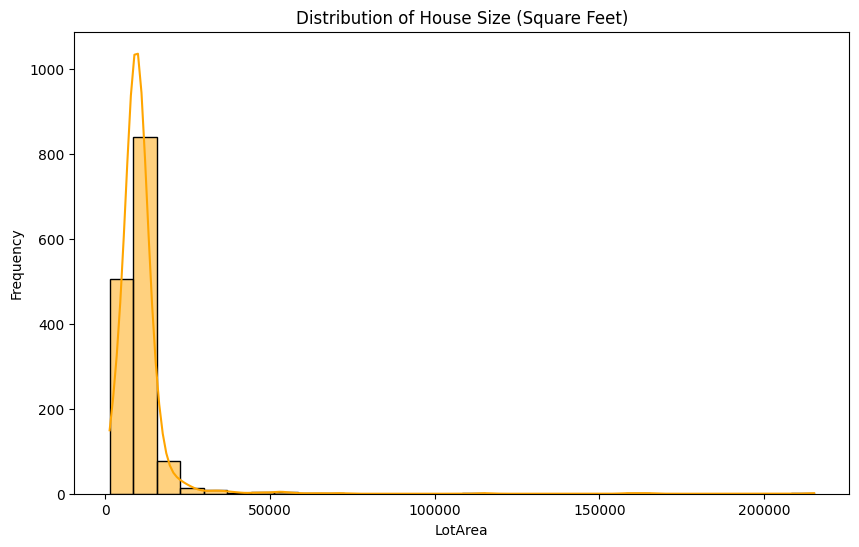

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of house size (square footage)
plt.figure(figsize=(10, 6))
sns.histplot(df['LotArea'], kde=True, bins=30, color='orange')
plt.title('Distribution of House Size (Square Feet)')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()


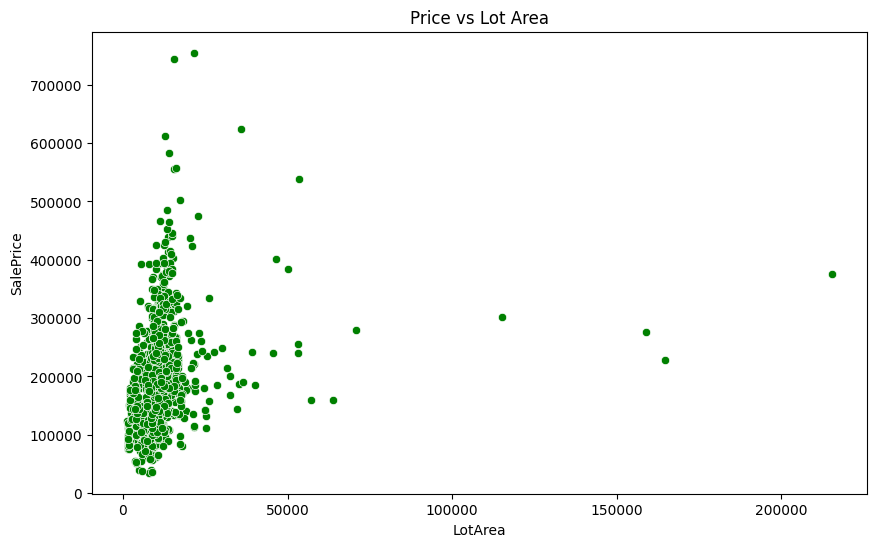

C:\Users\Dell\AppData\Local\Temp\ipykernel_15984\1105773555.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df, palette='coolwarm')


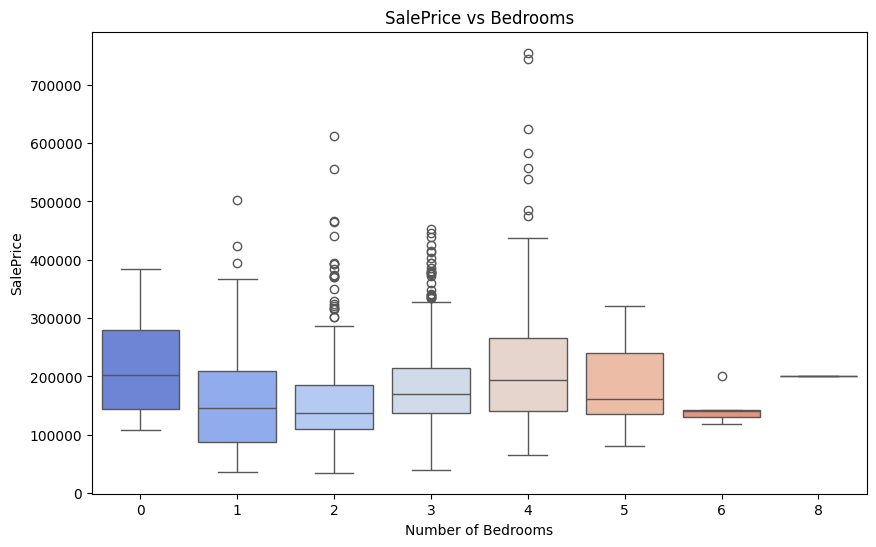

In [29]:
# Visualizing the relationship between square footage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df, color='green')
plt.title('Price vs Lot Area')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

# Visualizing the relationship between number of bedrooms and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df, palette='coolwarm')
plt.title('SalePrice vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('SalePrice')
plt.show()


Let us examine numerical features in the dataset

In [37]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.columns

Index(['Unnamed: 0', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
numeric_columns.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,0,NaN,65,8450,7,5,2003,2003,196,706,...,548,0,61,0,0,0,0,0,2008,208500
1,1,NaN,80,9600,6,8,1976,1976,0,978,...,460,298,0,0,0,0,0,0,2007,181500
2,2,NaN,68,11250,7,5,2001,2002,162,486,...,608,0,42,0,0,0,0,0,2008,223500
3,3,NaN,60,9550,7,5,1915,1970,0,216,...,642,0,35,272,0,0,0,0,2006,140000
4,4,NaN,84,14260,8,5,2000,2000,350,655,...,836,192,84,0,0,0,0,0,2008,250000


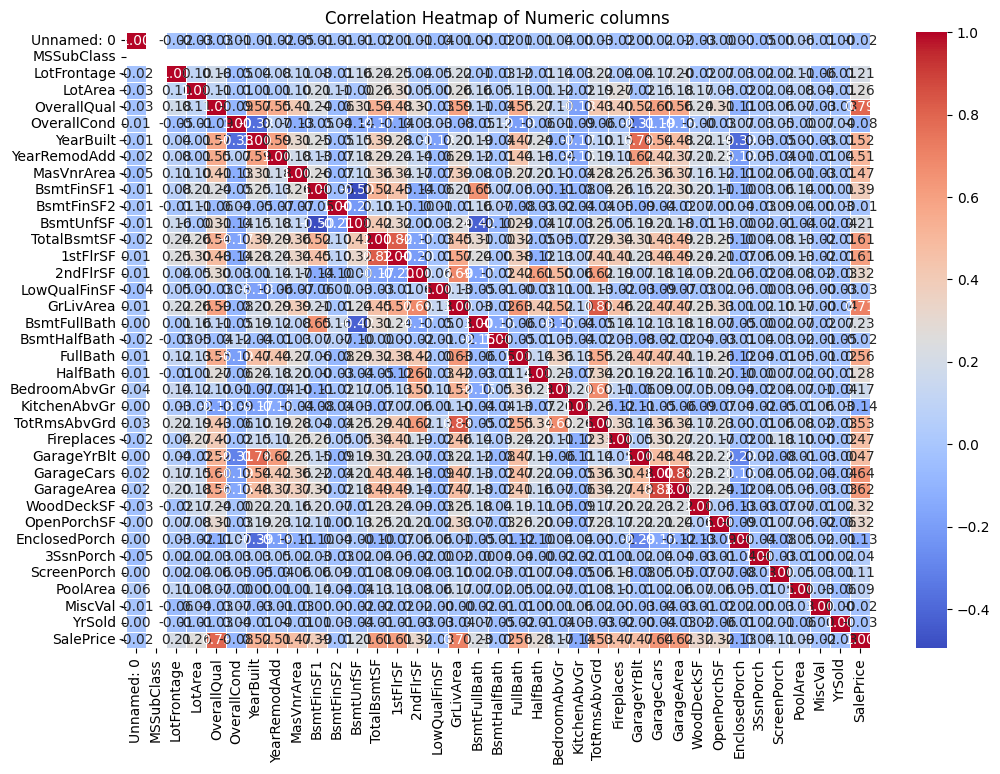

In [39]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numeric columns')

# Show the plot
plt.show()

In [41]:
# Create a new feature 'SalePrice per Square Foot'
df['Price_per_SqFt'] = df['SalePrice'] / df['LotArea']

# Create a new feature 'Property Age'
df['Property_Age'] = 2024 - df['YearBuilt']


In [42]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price_per_SqFt,Property_Age
0,0,NaN,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,No,No,0,Feb,2008,WD,Normal,208500,24.674556,21
1,1,NaN,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,No,No,0,May,2007,WD,Normal,181500,18.906250,48
2,2,NaN,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,No,No,0,Sep,2008,WD,Normal,223500,19.866667,23
3,3,NaN,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,No,No,0,Feb,2006,WD,Abnorml,140000,14.659686,109
4,4,NaN,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,No,No,0,Dec,2008,WD,Normal,250000,17.531557,24


the impact of house size, number of bedrooms, bathrooms, etc., on house prices.

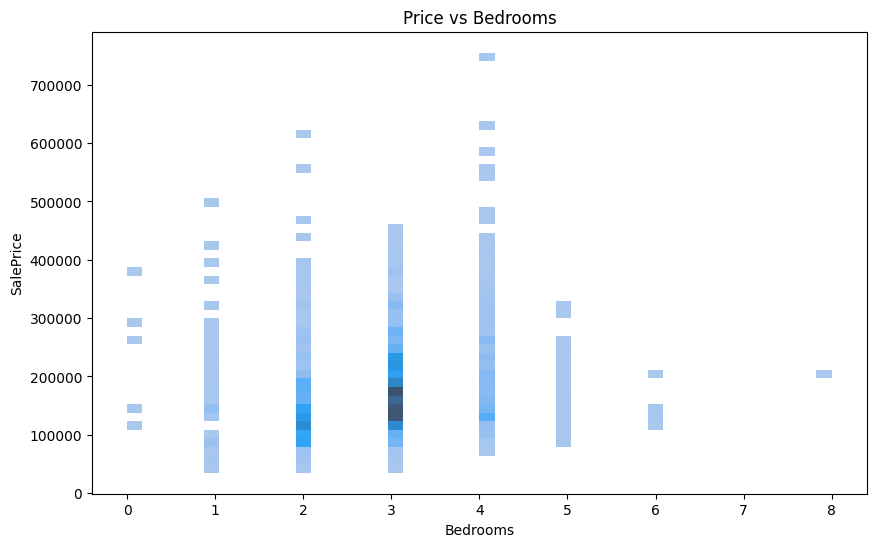

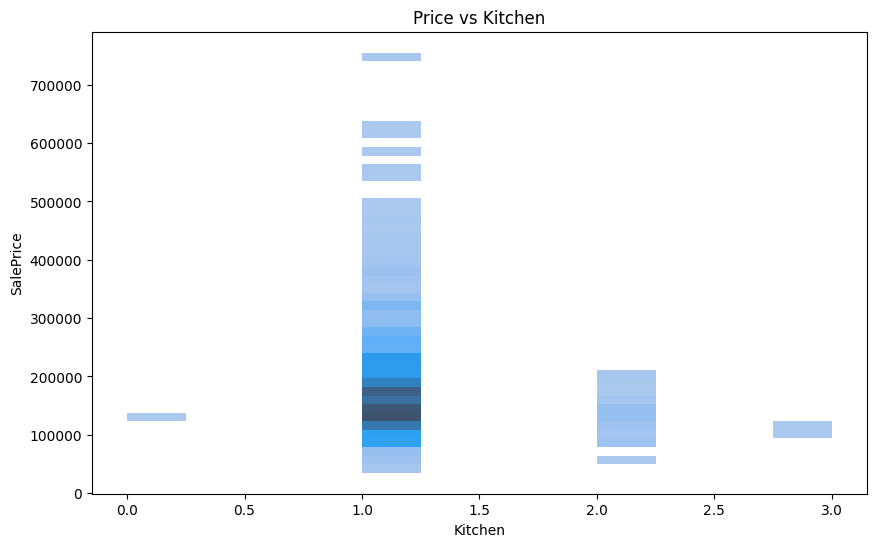

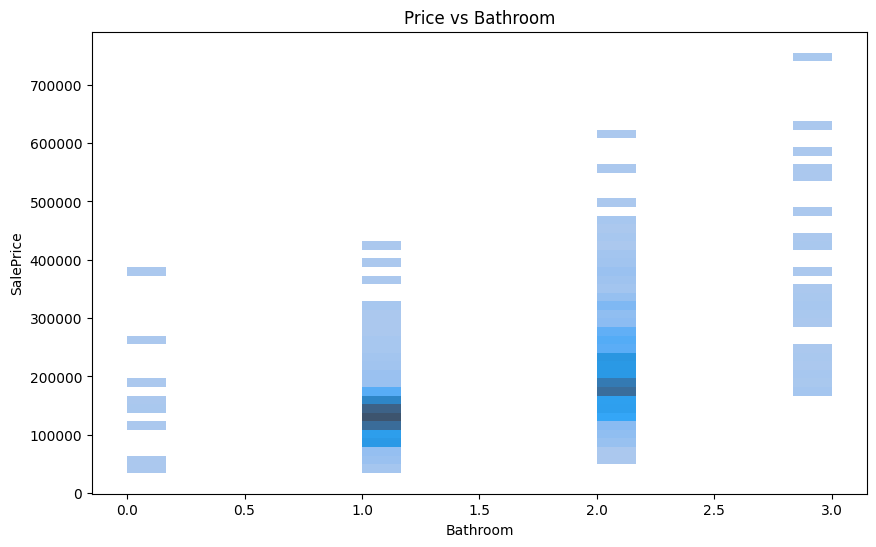

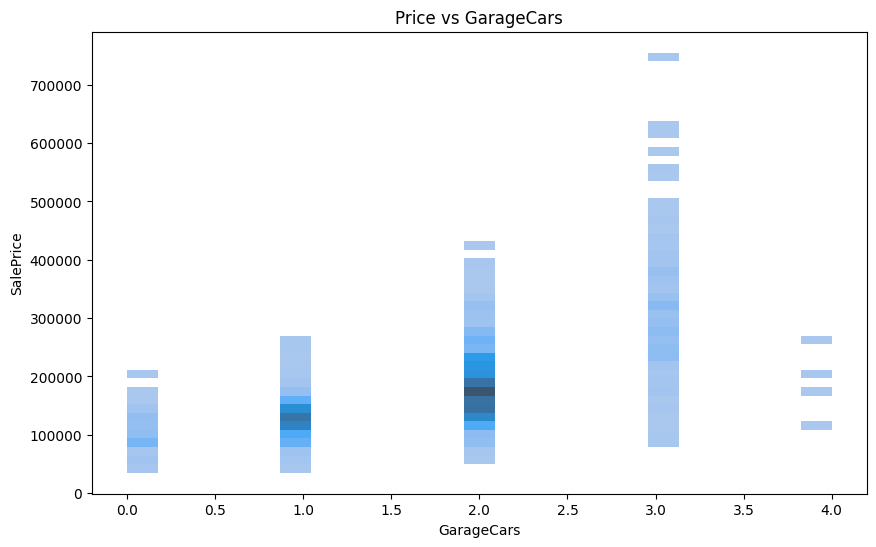

In [47]:
# Boxplot to examine price distribution based on the number of bedrooms,Kitchen,GarageCars, bathroom

plt.figure(figsize=(10, 6))
sns.histplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x='KitchenAbvGr', y='SalePrice', data=df)
plt.title('Price vs Kitchen')
plt.xlabel('Kitchen')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x='FullBath', y='SalePrice', data=df)
plt.title('Price vs Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x='GarageCars', y='SalePrice', data=df)
plt.title('Price vs GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()


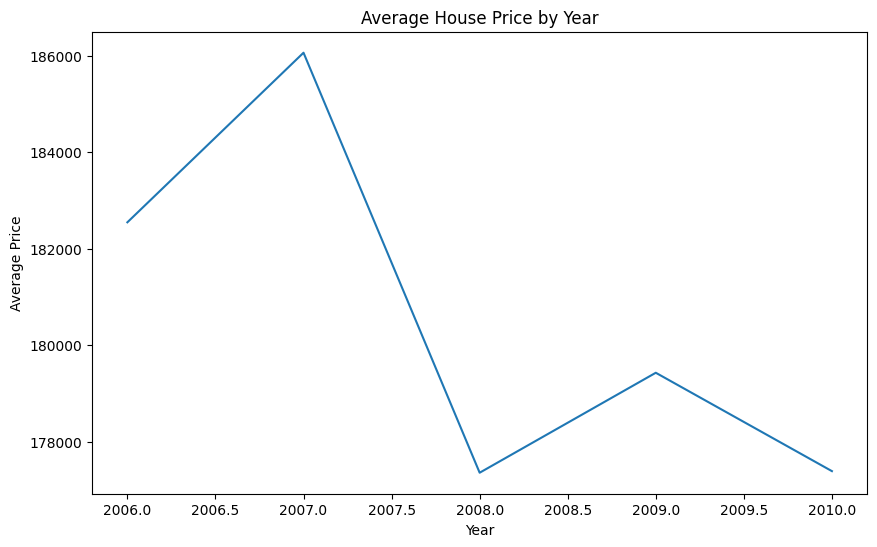

In [49]:
# Time series plot for historical price trends (Assuming 'Year_Sold' is in the dataset)
df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y')
df.groupby(df['YrSold'].dt.year)['SalePrice'].mean().plot(figsize=(10, 6))
plt.title('Average House Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


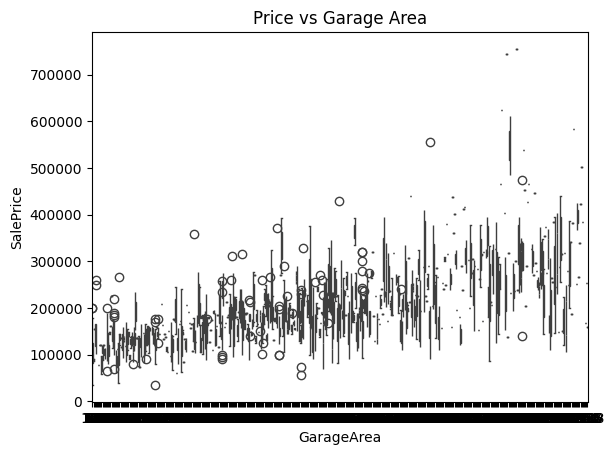

In [51]:
# Boxplot to explore how amenities like 'Garage Area' influence house prices
sns.boxplot(x='GarageArea', y='SalePrice', data=df)
plt.title('Price vs Garage Area')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()
